In [ ]:
%matplotlib inline

In [118]:
import matplotlib.pyplot as plt
import tensorflow as tf

import pandas as pd
import numpy as np
from itertools import cycle
import datetime
import time

%matplotlib inline

from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [4]:
filepath_train = 'D:/Работа программистом/coursera/Python для анализа данных/Week_6/Final_task/fashion-mnist_train.csv'
filepath_test = 'D:/Работа программистом/coursera/Python для анализа данных/Week_6/Final_task/fashion-mnist_test.csv'

In [82]:
df_rates = pd.read_csv(filepath_train)
x_train = df_rates.drop(['label'], axis=1).to_numpy()

df_test = pd.read_csv(filepath_test)
x_test = df_test.drop(['label'], axis=1).to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = df_rates['label'].to_numpy().T
y_test = df_test['label'].to_numpy().T

# Переводим вектора y в one-hot представление
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [167]:
batch_size = 128
num_classes = y_train.shape[1]
shape_x = x_train.shape[1]
epochs = 10
accuracy_test = []
loss_test = []

# Логистическая регрессия. Метрика 'accuracy'.

In [158]:
model_LR = tf.keras.models.Sequential()
model_LR.add(tf.keras.layers.Dense(num_classes, activation="softmax", input_shape=(shape_x,)))

In [159]:
model_LR.compile(
loss="categorical_crossentropy",
optimizer=tf.keras.optimizers.SGD(),
metrics=['accuracy']
)

history_LR = model_LR.fit(
            x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test),
            )

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.7179 - accuracy: 0.7539 - val_loss: 0.5630 - val_accuracy: 0.8102
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5303 - accuracy: 0.8189 - val_loss: 0.5128 - val_accuracy: 0.8276
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4949 - accuracy: 0.8307 - val_loss: 0.4918 - val_accuracy: 0.8365
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4756 - accuracy: 0.8369 - val_loss: 0.4781 - val_accuracy: 0.8412
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4625 - accuracy: 0.8418 - val_loss: 0.4701 - val_accuracy: 0.8443
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4534 - accuracy: 0.8447 - val_loss: 0.4627 - val_accuracy: 0.8476
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4459 - accuracy: 0.8470 - val_loss: 0.4598 - val_accuracy: 0.8475
Epoch 

In [168]:
loss, accuracy = model_LR.evaluate(x_test, y_test, verbose=0)
accuracy_test.append(accuracy)
loss_test.append(loss)

# Полносвязная нейронная сеть. Метрика 'accuracy'.

In [161]:
model_FR = tf.keras.models.Sequential()
model_FR.add(tf.keras.layers.Dense(256, activation="relu", input_shape=(shape_x,)))
model_FR.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

In [162]:
model_FR.compile(
loss="categorical_crossentropy",
optimizer=tf.keras.optimizers.SGD(),
metrics=['accuracy']
)

history_FR = model_FR.fit(
            x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test),
            )

Epoch 1/10
469/469 [==============================] - 10s 21ms/step - loss: 0.6715 - accuracy: 0.7720 - val_loss: 0.5141 - val_accuracy: 0.8228
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.4733 - accuracy: 0.8340 - val_loss: 0.4538 - val_accuracy: 0.8453
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.4278 - accuracy: 0.8487 - val_loss: 0.4268 - val_accuracy: 0.8529
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.4012 - accuracy: 0.8585 - val_loss: 0.4038 - val_accuracy: 0.8617
Epoch 5/10
469/469 [==============================] - 8s 18ms/step - loss: 0.3825 - accuracy: 0.8649 - val_loss: 0.3917 - val_accuracy: 0.8652
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3681 - accuracy: 0.8697 - val_loss: 0.3815 - val_accuracy: 0.8677
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.3565 - accuracy: 0.8735 - val_loss: 0.3735 - val_accuracy: 0.869

In [169]:
loss, accuracy = model_FR.evaluate(x_test, y_test, verbose=0)
accuracy_test.append(accuracy)
loss_test.append(loss)

# Свёрточная нейронная сеть. Метрика 'accuracy'.

In [105]:
x_train_sn = x_train.reshape(60000,28,28,1)
x_test_sn = x_test.reshape(10000,28,28,1)

In [106]:
model_CNN = tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation="relu", input_shape=(shape_x,)))
model_CNN.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

In [107]:
model_CNN.compile(
loss="categorical_crossentropy",
optimizer=tf.keras.optimizers.SGD(),
metrics=['accuracy']
)

history_CNN = model_CNN.fit(
            x_train_sn, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test_sn, y_test),
            )

Epoch 1/10
469/469 [==============================] - 182s 389ms/step - loss: 0.9657 - accuracy: 0.6820 - val_loss: 0.6543 - val_accuracy: 0.7523
Epoch 2/10
469/469 [==============================] - 229s 488ms/step - loss: 0.5826 - accuracy: 0.7847 - val_loss: 0.5229 - val_accuracy: 0.8185
Epoch 3/10
469/469 [==============================] - 151s 322ms/step - loss: 0.5091 - accuracy: 0.8152 - val_loss: 0.4801 - val_accuracy: 0.8312
Epoch 4/10
469/469 [==============================] - 141s 301ms/step - loss: 0.4622 - accuracy: 0.8344 - val_loss: 0.4293 - val_accuracy: 0.8480
Epoch 5/10
469/469 [==============================] - 139s 296ms/step - loss: 0.4351 - accuracy: 0.8439 - val_loss: 0.4576 - val_accuracy: 0.8315
Epoch 6/10
469/469 [==============================] - 138s 294ms/step - loss: 0.4119 - accuracy: 0.8527 - val_loss: 0.4083 - val_accuracy: 0.8502
Epoch 7/10
469/469 [==============================] - 135s 289ms/step - loss: 0.3937 - accuracy: 0.8602 - val_loss: 0.4146 -

In [170]:
loss, accuracy = model_CNN.evaluate(x_test_sn, y_test, verbose=0)
accuracy_test.append(accuracy)
loss_test.append(loss)

# Свёрточная нейронная сеть. Метрика 'accuracy'. Batch Normalization.

In [111]:
model_CNN_BN = tf.keras.models.Sequential()
model_CNN_BN.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_CNN_BN.add(tf.keras.layers.BatchNormalization())
model_CNN_BN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN_BN.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_CNN_BN.add(tf.keras.layers.BatchNormalization())
model_CNN_BN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_CNN_BN.add(tf.keras.layers.Flatten())
model_CNN_BN.add(tf.keras.layers.Dense(64, activation="relu", input_shape=(shape_x,)))
model_CNN_BN.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

In [112]:
model_CNN_BN.compile(
loss="categorical_crossentropy",
optimizer=tf.keras.optimizers.SGD(),
metrics=['accuracy']
)

history_CNN_BN = model_CNN_BN.fit(
            x_train_sn, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test_sn, y_test),
            )

Epoch 1/10
469/469 [==============================] - 201s 429ms/step - loss: 0.5366 - accuracy: 0.8135 - val_loss: 0.4428 - val_accuracy: 0.8505
Epoch 2/10
469/469 [==============================] - 202s 430ms/step - loss: 0.3613 - accuracy: 0.8719 - val_loss: 0.3423 - val_accuracy: 0.8762
Epoch 3/10
469/469 [==============================] - 199s 425ms/step - loss: 0.3165 - accuracy: 0.8871 - val_loss: 0.3157 - val_accuracy: 0.8884
Epoch 4/10
469/469 [==============================] - 201s 429ms/step - loss: 0.2909 - accuracy: 0.8964 - val_loss: 0.3029 - val_accuracy: 0.8898
Epoch 5/10
469/469 [==============================] - 201s 428ms/step - loss: 0.2702 - accuracy: 0.9028 - val_loss: 0.3024 - val_accuracy: 0.8920
Epoch 6/10
469/469 [==============================] - 200s 425ms/step - loss: 0.2531 - accuracy: 0.9094 - val_loss: 0.2842 - val_accuracy: 0.8963
Epoch 7/10
469/469 [==============================] - 204s 435ms/step - loss: 0.2402 - accuracy: 0.9150 - val_loss: 0.2818 -

In [171]:
loss, accuracy = model_CNN_BN.evaluate(x_test_sn, y_test, verbose=0)
accuracy_test.append(accuracy)
loss_test.append(loss)

# Результаты

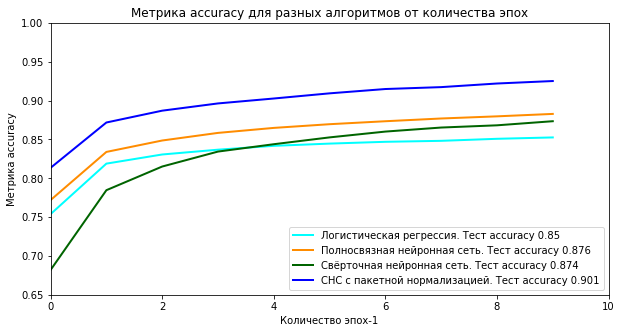

In [175]:
num_alg = 4

name_alg = []
name_alg.append("Логистическая регрессия")
name_alg.append("Полносвязная нейронная сеть")
name_alg.append("Свёрточная нейронная сеть")
name_alg.append("СНС с пакетной нормализацией")

history_list_accuracy = []
history_list_accuracy.append(history_LR.history['accuracy'][:10])
history_list_accuracy.append(history_FR.history['accuracy'][:10])
history_list_accuracy.append(history_CNN.history['accuracy'])
history_list_accuracy.append(history_CNN_BN.history['accuracy']) 
    
plt.figure(figsize=(10, 5))

colors = cycle(["aqua", 
                "darkorange", 
                "darkgreen",
                "blue", 
                "blueviolet", 
                "chartreuse",
                "cornflowerblue", 
                "darkred", 
                "darkseagreen",
                "navy",
               ])
for i, color in zip(range(num_alg), colors):
    plt.plot(
        history_list_accuracy[i],
        color=color,
        lw=lw,
        label=name_alg[i] + ". Тест accuracy " + str(round(accuracy_test[i], 3)),
    )

plt.xlim([0.0, 10.0])
plt.ylim([0.65, 1.00])
plt.xlabel("Количество эпох-1")
plt.ylabel("Метрика accuracy")
plt.title("Метрика accuracy для разных алгоритмов от количества эпох")
plt.legend(loc="lower right")
plt.show()

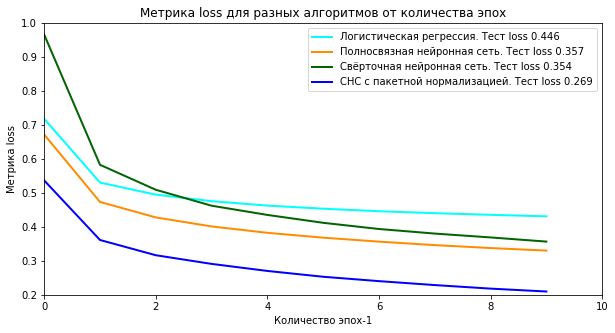

In [176]:
history_list_loss = []
history_list_loss.append(history_LR.history['loss'][:10])
history_list_loss.append(history_FR.history['loss'][:10])
history_list_loss.append(history_CNN.history['loss'])
history_list_loss.append(history_CNN_BN.history['loss']) 
    
plt.figure(figsize=(10, 5))

colors = cycle(["aqua", 
                "darkorange", 
                "darkgreen",
                "blue", 
                "blueviolet", 
                "chartreuse",
                "cornflowerblue", 
                "darkred", 
                "darkseagreen",
                "navy",
               ])
for i, color in zip(range(num_alg), colors):
    plt.plot(
        history_list_loss[i],
        color=color,
        lw=lw,
        label=name_alg[i] + ". Тест loss " + str(round(loss_test[i], 3)),
    )

plt.xlim([0.0, 10.0])
plt.ylim([0.2, 1.00])
plt.xlabel("Количество эпох-1")
plt.ylabel("Метрика loss")
plt.title("Метрика loss для разных алгоритмов от количества эпох")
plt.legend(loc="upper right")
plt.show()

Наилучшие результаты на данном наборе данных получены свёрточной нейронной сетью с пакетной нормализацией.